In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import mannwhitneyu
import scipy.stats as stats
import os
import matplotlib.patches as mpl_patches

In [20]:
df=pd.read_table('FigS5.csv',sep='\t')
df.head()

,Population,Island,As,Al,B,Ba,Cs,Ca,Cd,Co,...,Mn,Mo,Na,Ni,P,Rb,S,Se,Sr,Zn
0,F1,Fogo,0.870,630.630,78.38,414.780,0.10,149.30,0.03,1.73,...,72.950,0.730,53.26,1.04,0.180,99.840,5.45,0.94,2860.97,0.080
1,F10,Fogo,2.475,3005.045,85.04,27.165,0.06,49.65,0.13,1.02,...,65.235,2.135,28.09,1.97,0.785,15.185,5.10,2.82,408.02,3.085
2,F13,Fogo,0.900,10717.200,32.82,82.150,0.02,3.69,0.04,1.91,...,127.210,1.180,14.38,1.47,0.970,11.510,0.00,0.83,114.71,2.160
3,F15,Fogo,1.740,5100.320,119.42,407.420,0.08,128.97,0.07,3.33,...,108.120,2.200,49.66,2.59,0.820,62.710,8.87,3.30,3174.10,3.910
4,F16,Fogo,0.500,1411.820,77.92,111.130,0.05,52.10,0.03,0.94,...,36.380,1.370,11.91,1.02,0.320,20.500,2.11,1.71,866.13,0.000


In [21]:
df_grouped = df.groupby('Population').agg({'Island':'first',
                                'As':'median',
                                'Al':'median',
                                'B':'median',
                                'Ba':'median',
                                'Cs':'median',
                                'Ca':'median',
                                'Cd':'median',
                                'Co':'median',
                                'Cu':'median',
                                'Fe':'median',
                                'K':'median',
                                'Li':'median',
                                'Mg':'median',
                                'Mn':'median',
                                'Mo':'median',
                                'Na':'median',
                                'Ni':'median',
                                'P':'median',
                                'Rb':'median',
                                'S':'median',
                                'Se':'median',
                                'Sr':'median',
                                'Zn':'median'}).reset_index()
df_grouped.head()

,Population,Island,As,Al,B,Ba,Cs,Ca,Cd,Co,...,Mn,Mo,Na,Ni,P,Rb,S,Se,Sr,Zn
0,F1,Fogo,0.870,630.630,78.38,414.780,0.10,149.30,0.03,1.73,...,72.950,0.730,53.26,1.04,0.180,99.840,5.45,0.94,2860.97,0.080
1,F10,Fogo,2.475,3005.045,85.04,27.165,0.06,49.65,0.13,1.02,...,65.235,2.135,28.09,1.97,0.785,15.185,5.10,2.82,408.02,3.085
2,F13,Fogo,0.900,10717.200,32.82,82.150,0.02,3.69,0.04,1.91,...,127.210,1.180,14.38,1.47,0.970,11.510,0.00,0.83,114.71,2.160
3,F15,Fogo,1.740,5100.320,119.42,407.420,0.08,128.97,0.07,3.33,...,108.120,2.200,49.66,2.59,0.820,62.710,8.87,3.30,3174.10,3.910
4,F16,Fogo,0.500,1411.820,77.92,111.130,0.05,52.10,0.03,0.94,...,36.380,1.370,11.91,1.02,0.320,20.500,2.11,1.71,866.13,0.000


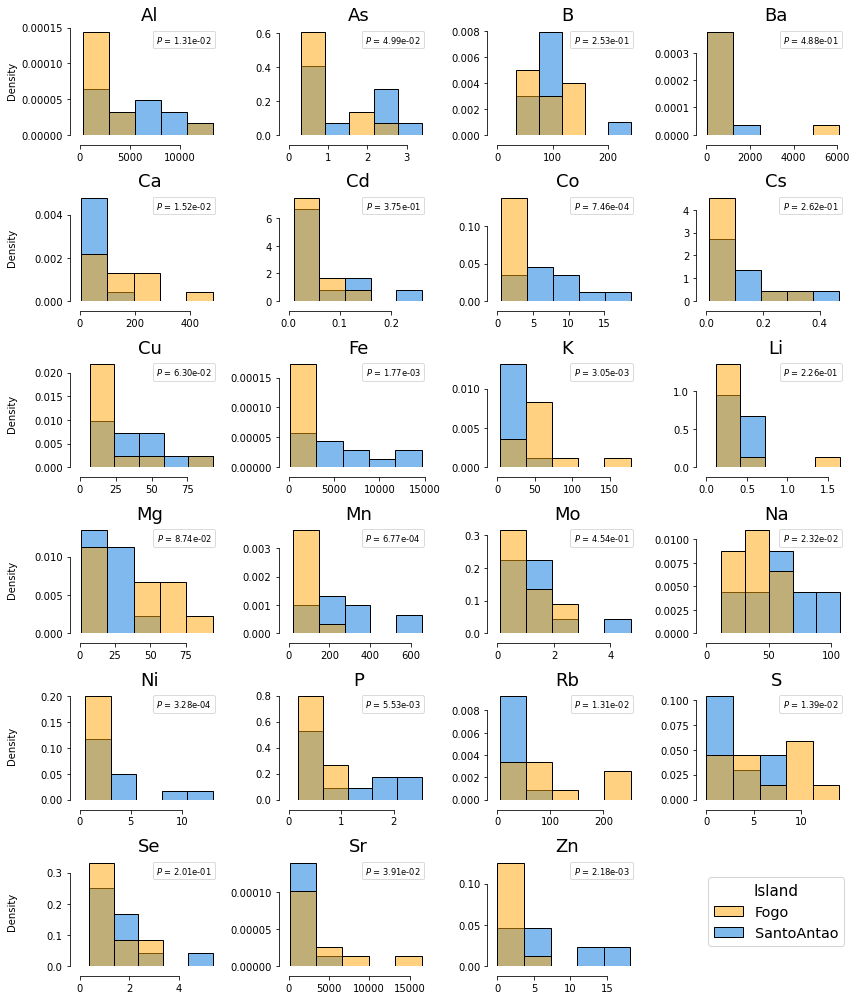

In [23]:
colors=['#FFA405','#0075DC']
elements=df_grouped.columns.to_list()
elements.remove('Island')
elements.remove('Population')
elements.sort()
sns.set_palette(sns.color_palette(colors))

def plots(element,idx1,idx2):
    sns.histplot(data=df_grouped,
            x=element,
            hue='Island',
#             hue_order=Order,
#             palette='colors',
            stat="density",
            bins=5,
            ax=axes[idx1,idx2])
def leg(element,idx1,idx2):
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2
    labels = []
    r,p = mannwhitneyu(df_grouped.loc[df_grouped['Island'] == 'Fogo',element],
                         df_grouped.loc[df_grouped['Island'] == 'SantoAntao',element])
    labels.append(r'$\itP$ = {:.2e}'.format(p))
    axes[idx1,idx2].legend(handles, labels, loc='best', fontsize='small', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)  
    axes[idx1,idx2].set_xlabel('')
    axes[idx1,idx2].set_ylabel('')
    axes[idx1,idx2].set_title(element,fontsize=18)
    axes[idx1,idx2].set_xlim(xmin=0)
fig,axes = plt.subplots(6,4,sharey=False,figsize=(12,14))
a,b=0,0
for index, value in enumerate(elements):
    if index % 4 == 0:
        if index == 0:
            plots(value,a,b)
            leg(value,a,b)
            axes[a,b].set_ylabel('Density')
            b+=1
        else:
            a+=1
            b=0
            plots(value,a,b)
            leg(value,a,b)
            axes[a,b].set_ylabel('Density')
            b+=1
    elif index == 22:
        plots(value,a,b)
        axes[a,b].set_ylabel('Density')
        legend=axes[a,b].get_legend()
        handles = legend.legendHandles
        axes[a,b+1].legend(handles, ['Fogo', 'SantoAntao'], title='Island',loc='center',
                           fontsize='x-large',title_fontsize=15,frameon=True)
        leg(value,a,b)
        axes[a,b+1].axis('off')
    else:
        plots(value,a,b)
        leg(value,a,b)
        
        b+=1
fig.align_ylabels(axes[:, ])
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig("FigS5.png", format="png",bbox_inches="tight", facecolor="w", dpi=600)